<a href="https://colab.research.google.com/github/Dhivyaindhu/sign_language_detection/blob/main/Untitled126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/sign_mnist_test.csv.zip'

Archive:  /content/sign_mnist_test.csv.zip
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test.csv     


In [ ]:
!unzip '/content/sign_mnist_train.csv.zip'

Archive:  /content/sign_mnist_train.csv.zip
replace sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train.csv    


In [ ]:
!pip install tensorflow numpy matplotlib scikit-learn opencv-python


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.preprocessing.image import ImageDataGenerator # Not needed for this task
from sklearn.model_selection import train_test_split
import cv2

# Define paths
train_path = '/content/sign_mnist_train.csv'
test_path = '/content/sign_mnist_test.csv'

# Load and preprocess the dataset
def load_data(path):
    """Loads data from a CSV file and preprocesses it.

    Args:
        path (str): The path to the CSV file.

    Returns:
        tuple: A tuple containing the image data and labels.
    """
    df = pd.read_csv(path)  # Read the CSV file using pandas
    labels = df['label'].values  # Extract labels from the 'label' column
    images = df.drop('label', axis=1).values  # Extract image data (excluding the label column)
    images = images.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1) for grayscale images
    #images = images / 255.0  # Normalize images between 0 and 1 # Already done later in the script
    return images, labels

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (27455, 28, 28, 1), y_train shape: (27455, 24)
X_test shape: (7172, 28, 28, 1), y_test shape: (7172, 24)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Adjust output size based on classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Changed input_shape to match data
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Adjust output size based on classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.1878 - loss: 2.6782 - val_accuracy: 0.6570 - val_loss: 1.1036
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.5581 - loss: 1.3271 - val_accuracy: 0.7550 - val_loss: 0.7162
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.6599 - loss: 0.9781 - val_accuracy: 0.8364 - val_loss: 0.4597
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.7176 - loss: 0.8027 - val_accuracy: 0.8713 - val_loss: 0.3997
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.7624 - loss: 0.6800 - val_accuracy: 0.8991 - val_loss: 0.3010
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7925 - loss: 0.5926 - val_accuracy: 0.8914 - val_loss: 0.2877
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.8093 - loss: 0.5468 - val_accuracy: 0.9037 - val_loss: 0.2747
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.8248 - loss: 0.5000 - val_accurac

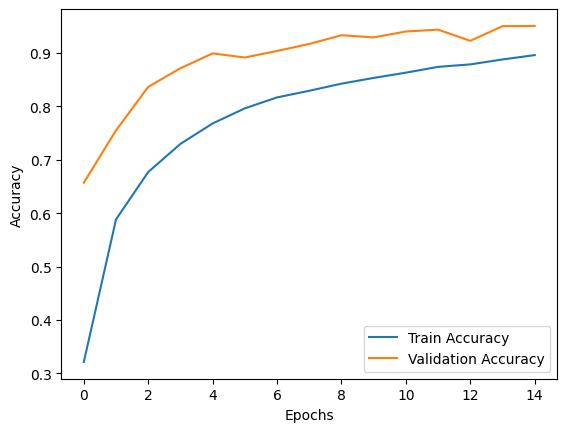

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(X_train)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=15)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('sign_language_model.h5')

# Download the model to your local machine
from google.colab import files
files.download('sign_language_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9481 - loss: 0.1480
Test Accuracy: 95.05%
